# EIA Bulk Data Testing

#### Loading in JSON organized objects stored within .txt file

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import json
import urllib.request
import time

#### Testing the loading speed of all bulk data series

In [126]:
# Github link containing EIA bulk data
file = r'https://raw.githubusercontent.com/ajmz1/eia-webapp/main/assets/STEO.txt'

t_start = time.time()
# Loop over all JSON formatted objects held within .txt file
for idx, line in enumerate(urllib.request.urlopen(file)):
    data_series = json.loads(line.decode('utf-8'))
    if idx == 0:
        df = pd.DataFrame(data_series)
    else:
        df = pd.concat([df, pd.DataFrame(data_series)], axis=0).reset_index(drop=True)

print(time.time() - t_start)

419.82600498199463


#### Testing the loading speed of creating a list of lists

In [4]:
# Github link containing EIA bulk data
file = r'https://raw.githubusercontent.com/ajmz1/eia-webapp/main/assets/STEO.txt'

t_start = time.time()
# Loop over all JSON formatted objects held within .txt file
data = []
for idx, line in enumerate(urllib.request.urlopen(file)):
    data_series = json.loads(line.decode('utf-8'))
    data.append(data_series)

print(time.time() - t_start)

1.7444980144500732


#### It is clear concat is very slow. Instead we will use the list approach and choose the series we want to investigate further

In [12]:
# Method for getting names of data series
names = []
key = 'name'
for idx in range(len(data)):
    if key in data[idx].keys():
        names.append(data[idx][key])
    else:
        pass

In [15]:
df = pd.DataFrame(names)
df.to_csv(r'C:\Users\Anthony\Documents\Python_Scripts\eia-webapp\assets\names.csv')

In [17]:
df

,0
0,Industrial Sector Generation from Distillate F...
1,Electric Power Sector Generation from Distilla...
2,Butanes/Butylenes Refinery and Blender Net Pro...
3,"Butanes/Butylenes Product Supplied, Annual"
4,"Real Gross State Product E. N. Central, Annual"
...,...
3960,U.S. Macroeconomic
3961,Industrial Production
3962,Price Indexes
3963,Miscellaneous


In [28]:
data[464]['data'][0]

['202312', 9.206433]

In [45]:
#energy = data[464]['data']
energy = data[3420]['data']
x = []
y = []
for idx in range(len(energy)):
    x.append(energy[idx][0])
    y.append(energy[idx][1])
#x = pd.to_datetime(x, format='%Y%m').to_period('M').dt.to_timestamp()
x = pd.to_datetime(x, format='%Y%m')

In [46]:
x

DatetimeIndex(['2023-12-01', '2023-11-01', '2023-10-01', '2023-09-01',
               '2023-08-01', '2023-07-01', '2023-06-01', '2023-05-01',
               '2023-04-01', '2023-03-01',
               ...
               '1990-10-01', '1990-09-01', '1990-08-01', '1990-07-01',
               '1990-06-01', '1990-05-01', '1990-04-01', '1990-03-01',
               '1990-02-01', '1990-01-01'],
              dtype='datetime64[ns]', length=408, freq=None)

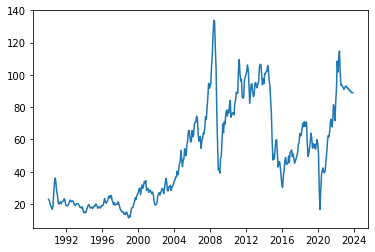

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x, y)

In [48]:
data[3420]

{'series_id': 'STEO.WTIPUUS.M',
 'name': 'West Texas Intermediate Crude Oil Price, Monthly',
 'units': 'dollars per barrel',
 'f': 'M',
 'copyright': 'None',
 'source': 'U.S. Energy Information Administration (EIA) - Short Term Energy Outlook',
 'geography': 'USA',
 'start': '199001',
 'end': '202312',
 'lastHistoricalPeriod': '202208',
 'last_updated': '2022-09-07T12:07:23-04:00',
 'data': [['202312', 89],
  ['202311', 89],
  ['202310', 89],
  ['202309', 90],
  ['202308', 90],
  ['202307', 91],
  ['202306', 91],
  ['202305', 92],
  ['202304', 92],
  ['202303', 93],
  ['202302', 93],
  ['202301', 92],
  ['202212', 91],
  ['202211', 92],
  ['202210', 93],
  ['202209', 94],
  ['202208', 93.7],
  ['202207', 101.62],
  ['202206', 114.84],
  ['202205', 109.55],
  ['202204', 101.78],
  ['202203', 108.5],
  ['202202', 91.64],
  ['202201', 83.22],
  ['202112', 71.71],
  ['202111', 79.15],
  ['202110', 81.48],
  ['202109', 71.65],
  ['202108', 67.73],
  ['202107', 72.49],
  ['202106', 71.38],
 

In [56]:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
# or: requests.get(url).content

resp = urlopen("https://api.eia.gov/bulk/STEO.zip")
myzip = ZipFile(BytesIO(resp.read()))
for line in myzip.open(myzip.namelist()[0]).readlines():
    print(line.decode('utf-8'))
    i = 0
    if i == 0:
        break

{"series_id":"STEO.PADI_CH.M","name":"Unplanned liquid fuel production disruptions, China, Monthly","units":"million barrels per day","f":"M","copyright":"None","source":"U.S. Energy Information Administration (EIA) - Short Term Energy Outlook","geography":"CHN","start":"201101","end":"202209","lastHistoricalPeriod":"202209","last_updated":"2022-10-12T12:14:49-04:00","data":[["202209",0],["202208",0],["202207",0],["202206",0],["202205",0],["202204",0],["202203",0],["202202",0],["202201",0],["202112",0],["202111",0],["202110",0],["202109",0],["202108",0],["202107",0],["202106",0],["202105",0],["202104",0],["202103",0],["202102",0],["202101",0],["202012",0],["202011",0],["202010",0],["202009",0],["202008",0],["202007",0],["202006",0],["202005",0],["202004",0],["202003",0],["202002",0],["202001",0],["201912",0],["201911",0],["201910",0],["201909",0],["201908",0.025],["201907",0],["201906",0],["201905",0],["201904",0],["201903",0],["201902",0],["201901",0],["201812",0],["201811",0],["20181

In [87]:
import time
from zipfile import ZipFile
from urllib.request import urlopen
from io import BytesIO
import json

# Load in the data to a list of JSON object
t_start_data = time.time()

# Loop through bulk data and append to list
eia_file = 'https://api.eia.gov/bulk/STEO.zip'
staged_data = []
with ZipFile(BytesIO(urlopen(eia_file).read())) as f:
    for idx, line in enumerate(f.open(f.namelist()[0])):
        print(json.loads(line.decode('utf-8')).keys())
        
        staged_data.append(json.loads(line.decode('utf-8')))
        if idx == 0:
            break

dict_keys(['series_id', 'name', 'units', 'f', 'copyright', 'source', 'geography', 'start', 'end', 'lastHistoricalPeriod', 'last_updated', 'data'])


In [94]:
import time
from zipfile import ZipFile
from urllib.request import urlopen
from io import BytesIO
import json


def stage_data():
    # Load in the data to a list of JSON object
    t_start_data = time.time()
    print(f'Beginning Data Staging. Start Time: {t_start_data}')

    # Set up for data staging
    eia_file = 'https://api.eia.gov/bulk/STEO.zip'
    staged_data = []
    staged_data_name = []

    # Point to the unzipped file that we want to read
    with ZipFile(BytesIO(urlopen(eia_file).read())) as f:
        # Loop through each row and append the JSON object to a list
        for idx, line in enumerate(f.open(f.namelist()[0])):
            # Add single row JSON object to list
            row_data = json.loads(line.decode('utf-8'))
            staged_data.append(row_data)
            # Collect the names of the rows that have the 'name' key
            if 'name' in row_data.keys():
                staged_data_name.append(row_data['name'])
            else:
                pass

    print(f'Completed Data Staging in {(time.time() - t_start_data):.2f}')

    return staged_data, staged_data_name


out = stage_data()[1]

Beginning Data Staging. Start Time: 1665734774.4639277
Completed Data Staging in 2.52


In [96]:
pd.Series(out)

0       Unplanned liquid fuel production disruptions, ...
1       Electric power sector  consumption of petroleu...
2       Electric power sector  consumption of petroleu...
3       Unplanned liquid fuel production disruptions, ...
4       Unplanned liquid fuel production disruptions, ...
                              ...                        
3960                                   U.S. Macroeconomic
3961                                Industrial Production
3962                                        Price Indexes
3963                                        Miscellaneous
3964                        U.S. CO<SUB>2</SUB> Emissions
Length: 3965, dtype: object